In [1]:
from test_function import *
print(preprocess)

<function preprocess at 0x2acf59ee9a60>


In [2]:
dominant = pd.read_csv("dominant_std.tsv", sep = '\t')
recessive = pd.read_csv('recessive_std.tsv', sep = '\t')
omit = pd.read_csv('unannotated_omit_std.tsv', sep = '\t')
omit = preprocess(omit, 'clinvar_result',Balanced = True)

Unbalanced,
with num of 0 is 46363, num of 1 is 31317.

start balancing...
with num of 0 is 31317, num of 1 is 31317.



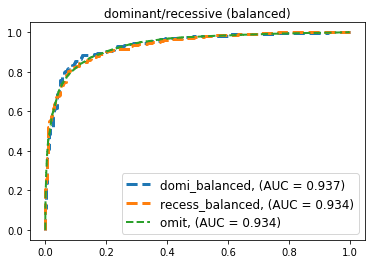

In [3]:
#original model(balanced)
x_column = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq', 'UNEECON']
y_column = 'clinvar_result'

plt.rcParams['figure.figsize'] = [6,4]
domi2 = splitNfit(dominant, x_column, y_column)
recess2 = splitNfit(recessive, x_column, y_column)
omit2 = splitNfit(omit,x_column, y_column)

drawROC(domi2[3],domi2[4],label = 'domi_balanced')
drawROC(recess2[3],recess2[4], label = "recess_balanced")
drawROC(omit2[3],omit2[4], label = "omit", lw = 2, lastone = True, title = "dominant/recessive (balanced)")

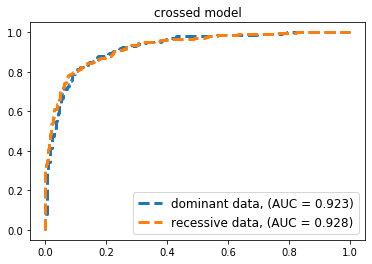

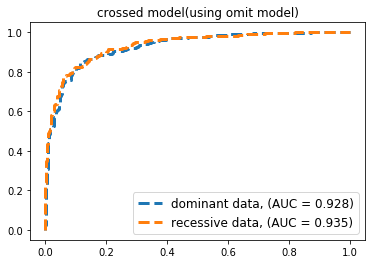

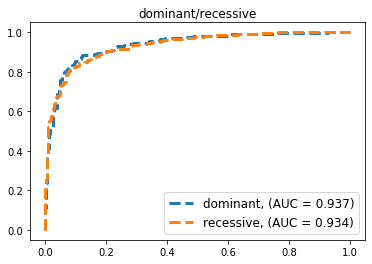

In [6]:
#cross model(balanced)
domi_cross = splitNfit(dominant, x_column, y_column, regression = recess2[5])
recess_cross = splitNfit(recessive, x_column, y_column, regression = domi2[5])

drawROC(domi_cross[3],domi_cross[4],label = 'dominant data')
drawROC(recess_cross[3],recess_cross[4], label = "recessive data", lastone = True, title = "crossed model")

domi_cross_omit = splitNfit(dominant, x_column, y_column, regression = omit2[5])
recess_cross_omit = splitNfit(recessive, x_column, y_column, regression = omit2[5])

drawROC(domi_cross_omit[3],domi_cross_omit[4],label = 'dominant data')
drawROC(recess_cross_omit[3],recess_cross_omit[4], label = "recessive data", lastone = True, title = "crossed model(using omit model)")

#confirmation
drawROC(domi2[3],domi2[4],label = 'dominant')
drawROC(recess2[3],recess2[4], label = "recessive",lastone = True, title = "dominant/recessive")


In [24]:
def get_ROC(ax,ytest, ytest_hat, label, lastone = False, x = 'False Positive Rate', y = 'True Positive Rate', title = None, legendloc = 'lower right', lw = 2, linestyle = '-'):
    fpr, tpr, thresholds = roc_curve(ytest, ytest_hat)
    auroc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw = lw, linestyle = linestyle, label = label +', (auROC=%0.3f)'%auroc)
    if(lastone == True):
        ax.set_xlabel(x,fontsize = 22)
        ax.set_ylabel(y, fontsize = 22)
        ax.set_title(title, fontsize = 22)
        ax.legend(loc='lower right',fontsize = 22)

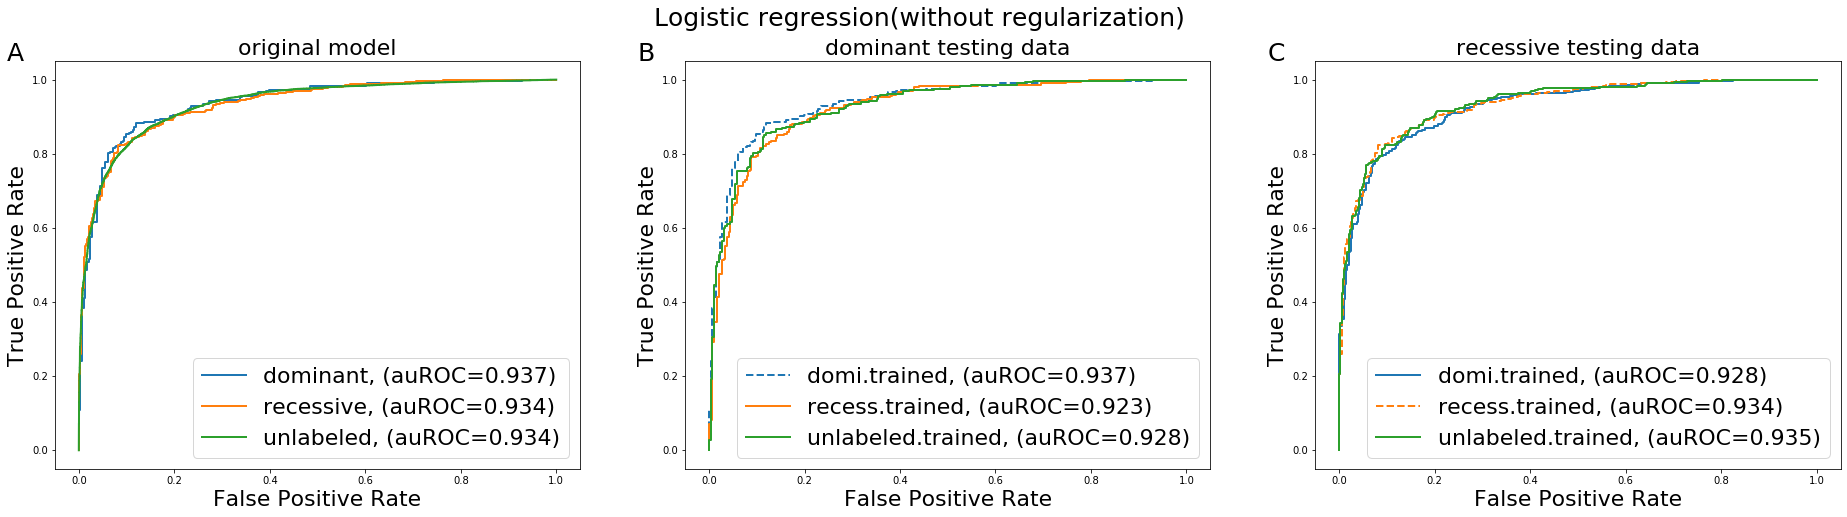

In [27]:
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Logistic regression(without regularization)', size = 25)

domi_cross = splitNfit(dominant, x_column, y_column, regression = recess2[5])
recess_cross = splitNfit(recessive, x_column, y_column, regression = domi2[5])


get_ROC(ax[0],domi2[3],domi2[4],label = 'dominant')
get_ROC(ax[0],recess2[3],recess2[4], label = "recessive")
get_ROC(ax[0],omit2[3],omit2[4], label = "unlabeled",  lastone = True, title = "original model")
ax[0].text(-0.15, 1.05, 'A', size = 25)




domi_cross_omit = splitNfit(dominant, x_column, y_column, regression = omit2[5])
recess_cross_omit = splitNfit(recessive, x_column, y_column, regression = omit2[5])

get_ROC(ax[1],domi2[3],domi2[4],label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_cross[3],domi_cross[4],label = 'recess.trained')
get_ROC(ax[1], domi_cross_omit[3],domi_cross_omit[4],label = 'unlabeled.trained',lastone = True, title = "dominant testing data")
ax[1].text(-0.15, 1.05, 'B', size = 25)




get_ROC(ax[2], recess_cross[3],recess_cross[4], label = "domi.trained")
get_ROC(ax[2],recess2[3],recess2[4], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_cross_omit[3],recess_cross_omit[4], label = 'unlabeled.trained', lastone = True, title = "recessive testing data")
ax[2].text(-0.15, 1.05, 'C', size = 25)

plt.savefig('figure/2_logistic_reg.pdf',bbox_inches='tight')
plt.show()

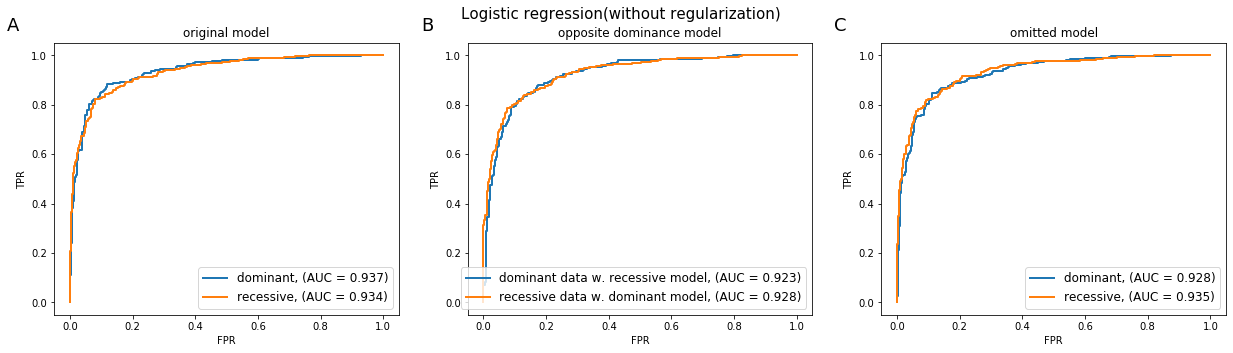

In [82]:
# plt.rcParams['figure.figsize'] = [21,5]
# fig, ax = plt.subplots(1, 3)
# fig.suptitle('Logistic regression(without regularization)', size = 15)

# domi_cross = splitNfit(dominant, x_column, y_column, regression = recess2[5])
# recess_cross = splitNfit(recessive, x_column, y_column, regression = domi2[5])

# get_ROC(ax[0], domi2[3],domi2[4],label = 'dominant')
# get_ROC(ax[0], recess2[3],recess2[4], label = "recessive", lastone = True, title = "original model")
# ax[0].text(-0.2, 1.1, 'A', size = 18)


# domi_cross_omit = splitNfit(dominant, x_column, y_column, regression = omit2[5])
# recess_cross_omit = splitNfit(recessive, x_column, y_column, regression = omit2[5])

# ax[1].set_title('crossed model(using opposite dominance model)')
# get_ROC(ax[1], domi_cross[3],domi_cross[4],label = 'dominant data w. recessive model')
# get_ROC(ax[1], recess_cross[3],recess_cross[4], label = "recessive data w. dominant model", lastone = True, title = "opposite dominance model")
# ax[1].text(-0.2, 1.1, 'B', size = 18)


# get_ROC(ax[2], domi_cross_omit[3],domi_cross_omit[4],label = 'dominant')
# get_ROC(ax[2], recess_cross_omit[3],recess_cross_omit[4], label = 'recessive', lastone = True, title = "omitted model")
# ax[2].text(-0.2, 1.1, 'C', size = 18)

# plt.savefig('figure/2_logistic_reg.pdf')

# drawROC(domi2[3],domi2[4],label = 'dominant')
# drawROC(recess2[3],recess2[4], label = "recessive",lastone = True, title = "dominant/recessive")


/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


                dominant  recessive
SIFT_pred      -0.259376   0.175545
LRT_pred        0.686320   0.529900
MA_pred         0.114995  -0.066391
PROVEN_pred     1.019769   0.505544
SLR_score      -0.182250  -0.031698
SIFT_score     -0.043249  -0.045606
LRT_omega      -0.112508   0.045364
MA_score        0.357348   0.393132
PROVEN_score    0.235927  -0.518131
Grantham        0.282683   0.018770
HMMEntropy      0.442094   0.129878
HMMRelEntropy  -0.219547   0.003149
PredRSAB        0.054005   0.097863
PredRSAI        0.099774   0.036546
PredRSAE       -0.074470  -0.032564
PredBFactorF    0.069682   0.365670
PredBFactorM    0.020740   0.176976
PredBFactorS    0.070338   0.192121
PredStabilityH -0.223852  -0.058749
PredStabilityM  0.044694   0.139602
PredStabilityL  0.206776  -0.032460
PredSSE         0.170767   0.096065
PredSSH        -0.191200  -0.168658
PredSSC        -0.043389   0.203054
dscore          0.220150   0.260462
phyloP_pri     -0.039347  -0.117232
phyloP_mam      0.094495   0

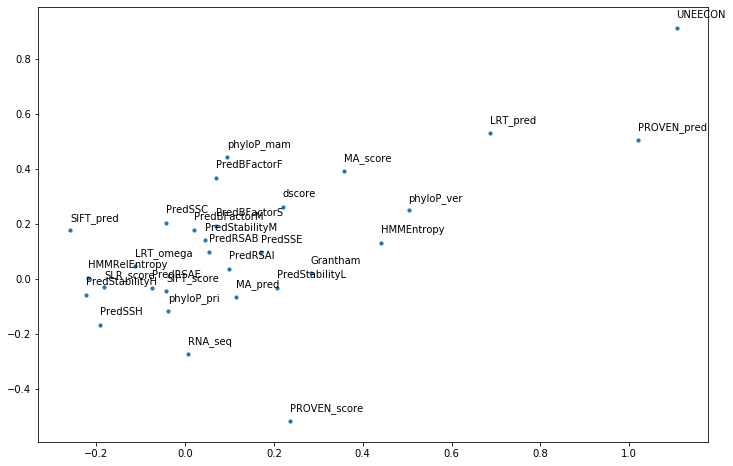

In [8]:
plt.rcParams['figure.figsize'] = [12,8]
coef_dominant = domi2[5].coef_.flatten()
coef_recessive = recess2[5].coef_.flatten()
columnName = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON']
cor = pd.DataFrame({'dominant': coef_dominant, 'recessive': coef_recessive}, index = columnName)

cor.np = cor.reset_index().values
print(cor)

plt.scatter(cor['dominant'], cor['recessive'], s = 10)
i = 0
for x,y in zip(cor['dominant'], cor['recessive']):
    label = columnName[i]    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords = "offset points", # how to position the text
                 xytext=(0,10)) # distance from text to points (x,y)
    i += 1
    
plt.show()


## regularization

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


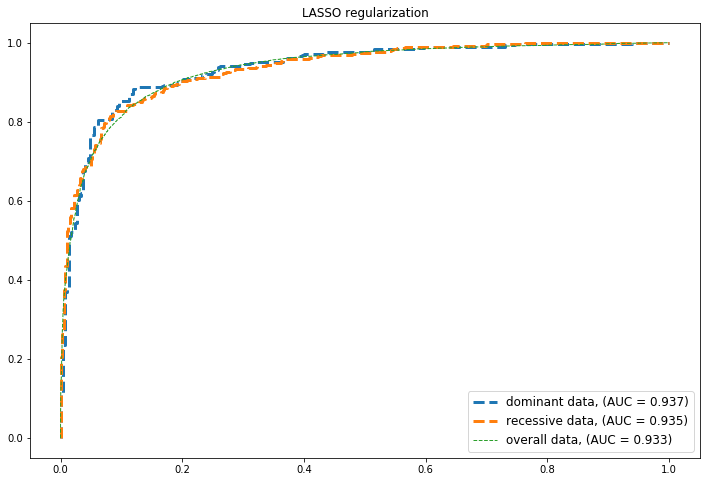

In [9]:
# regularization
domi_l1 = splitNfit(dominant, x_column, y_column, regulation = 'l1')
recess_l1 = splitNfit(recessive, x_column, y_column, regulation = 'l1')
omit_l1 =splitNfit(omit,x_column, y_column,regulation = 'l1')
drawROC(domi_l1[3], domi_l1[4],label = 'dominant data')
drawROC(recess_l1[3],recess_l1[4], label = "recessive data")
drawROC(omit_l1[3],omit_l1[4], lw =1,label = "overall data",lastone = True, title = "LASSO regularization")

In [12]:
domi_l2 = splitNfit(dominant, x_column, y_column, regulation = 'l2')
recess_l2 = splitNfit(recessive, x_column, y_column, regulation = 'l2')
omit_l2 =splitNfit(omit,x_column, y_column,regulation = 'l2')
plt.rcParams['figure.figsize'] = [6,4]
# drawROC(domi_l2[3], domi_l2[4],label = 'dominant data')
# drawROC(recess_l2[3],recess_l2[4], label = "recessive data")
# drawROC(omit_l2[3],omit_l2[4], lw =1,label = "overall data",lastone = True, title = "Ridge regularization")

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


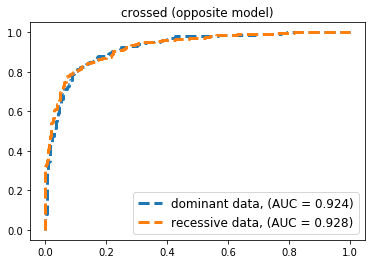

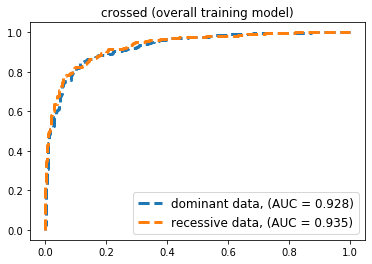

In [14]:
# ridge cross
plt.rcParams['figure.figsize'] = [6,4]
domi_l2_cross = splitNfit(dominant, x_column, y_column, regulation = 'l2', regression = recess_l2[5])
recess_l2_cross = splitNfit(recessive, x_column, y_column, regulation = 'l2',regression = domi_l2[5])

drawROC(domi_l2_cross[3], domi_l2_cross[4],label = 'dominant data')
drawROC(recess_l2_cross[3],recess_l2_cross[4], label = "recessive data", lastone = True, title = "crossed (opposite model)")


domi_l2_overall = splitNfit(dominant, x_column, y_column, regulation = 'l2', regression = omit_l2[5])
recess_l2_overall = splitNfit(recessive, x_column, y_column, regulation = 'l2',regression = omit_l2[5])

drawROC(domi_l2_overall[3], domi_l2_overall[4],label = 'dominant data')
drawROC(recess_l2_overall[3],recess_l2_overall[4], label = "recessive data", lastone = True, title = "crossed (overall training model)")

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


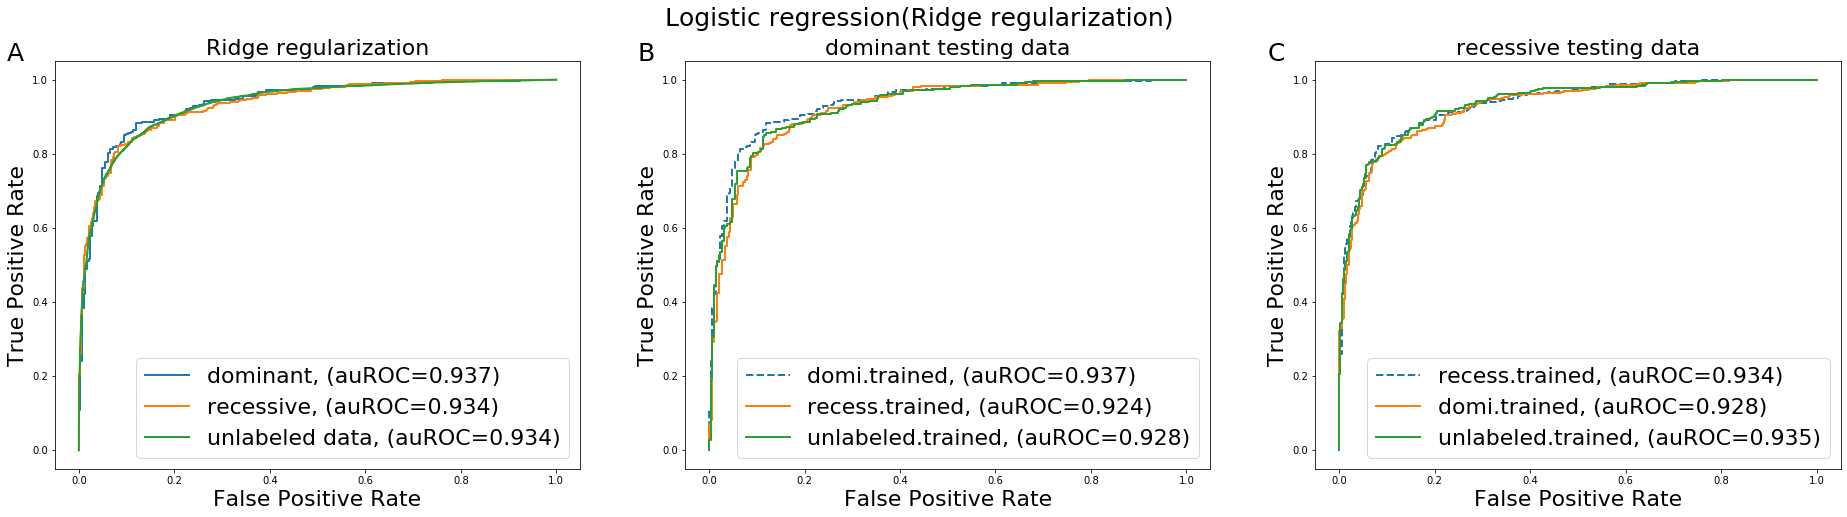

In [30]:
## save as pdf plot
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Logistic regression(Ridge regularization)', size = 25)


domi_l2 = splitNfit(dominant, x_column, y_column, regulation = 'l2')
recess_l2 = splitNfit(recessive, x_column, y_column, regulation = 'l2')
omit_l2 =splitNfit(omit,x_column, y_column,regulation = 'l2')


get_ROC(ax[0], domi_l2[3], domi_l2[4],label = 'dominant')
get_ROC(ax[0], recess_l2[3],recess_l2[4], label = "recessive")
get_ROC(ax[0], omit_l2[3],omit_l2[4],label = "unlabeled data" ,lastone = True, title = "Ridge regularization")
ax[0].text(-0.15, 1.05, 'A', size = 25)

# dominant
domi_l2_cross = splitNfit(dominant, x_column, y_column, regulation = 'l2', regression = recess_l2[5])
domi_l2_overall = splitNfit(dominant, x_column, y_column, regulation = 'l2', regression = omit_l2[5])


get_ROC(ax[1], domi_l2[3], domi_l2[4],label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_l2_cross[3], domi_l2_cross[4],label = 'recess.trained')
get_ROC(ax[1], domi_l2_overall[3], domi_l2_overall[4],label = 'unlabeled.trained', lastone = True, title = 'dominant testing data')

ax[1].text(-0.15, 1.05, 'B', size = 25)


#recessive

recess_l2_cross = splitNfit(recessive, x_column, y_column, regulation = 'l2',regression = domi_l2[5])
recess_l2_overall = splitNfit(recessive, x_column, y_column, regulation = 'l2',regression = omit_l2[5])

get_ROC(ax[2], recess_l2[3],recess_l2[4], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_l2_cross[3],recess_l2_cross[4], label = "domi.trained")
get_ROC(ax[2], recess_l2_overall[3],recess_l2_overall[4], label = "unlabeled.trained",lastone = True, title = "recessive testing data")
ax[2].text(-0.15, 1.05, 'C', size = 25)

plt.savefig('figure/2_ridge.pdf', bbox_inches='tight')
#plt.show()

In [29]:
# domi_cross_dataframe = pd.DataFrame({'result': domi_l2_cross[3], 'self_predict': domi_l2[4], 'cross_predict' : domi_l2_cross[4], 'overall_predict':  domi_l2_overall[4]})
# domi_cross_dataframe.to_csv('~/work/project/not_conflict/r_noconflict/domi_logistic.tsv', sep = '\t',index = False)

# recess_cross_dataframe = pd.DataFrame({'result': recess_l2_cross[3], 'self_predict': recess_l2[4], 'cross_predict' : recess_l2_cross[4], 'overall_predict':  recess_l2_overall[4]})
# recess_cross_dataframe.to_csv('~/work/project/not_conflict/r_noconflict/recess_logistic.tsv', sep = '\t',index = False)


In [14]:
coef_domi_LASSO = domi_l1[5].coef_.flatten()
coef_recess_LASSO = recess_l1[5].coef_.flatten()
coef_domi_RIDGE = domi_l2[5].coef_.flatten()
coef_recess_RIDGE = recess_l2[5].coef_.flatten()

cor_reg = pd.DataFrame({'domi_ridge':coef_domi_RIDGE, 'recess_ridge': coef_recess_RIDGE, 'dominant': coef_dominant, 'recessive': coef_recessive, 'domi_LASSO' : coef_domi_LASSO, 'recess_LASSO' : coef_recess_LASSO}, index = columnName)
print(cor_reg)


                domi_ridge  recess_ridge  dominant  recessive  domi_LASSO  \
SIFT_pred        -0.293027      0.154959 -0.259376   0.175545   -0.196235   
LRT_pred          0.662244      0.517116  0.686320   0.529900    0.662543   
MA_pred           0.081893     -0.082125  0.114995  -0.066391    0.050692   
PROVEN_pred       0.987465      0.487197  1.019769   0.505544    0.958187   
SLR_score        -0.183265     -0.032216 -0.182250  -0.031698   -0.176399   
SIFT_score       -0.052707     -0.051859 -0.043249  -0.045606   -0.008426   
LRT_omega        -0.095963      0.045120 -0.112508   0.045364    0.000000   
MA_score          0.373178      0.401819  0.357348   0.393132    0.372608   
PROVEN_score      0.218657     -0.528052  0.235927  -0.518131    0.184622   
Grantham          0.281081      0.017805  0.282683   0.018770    0.266745   
HMMEntropy        0.443634      0.126523  0.442094   0.129878    0.223989   
HMMRelEntropy    -0.222724      0.006680 -0.219547   0.003149    0.000000   

In [1]:
plt.rcParams['figure.figsize'] = [10,8]

a = np.arange(-1,4)
plt.plot(a,a)
plt.scatter(cor_reg['domi_ridge'], cor_reg['recess_ridge'], s = 10)
i = 0
for x,y in zip(cor_reg['domi_ridge'], cor_reg['recess_ridge']):
    label = cor_reg.index[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size =10)
    i += 1
plt.title('coefficient(after ridge regularization)', size = 10)
#plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['figure.figsize'] = [6,4]
plt.xlim(-0.5,1.2)
plt.ylim(-0.8,1.2)
plt.xlabel('dominant', size = 10)
plt.ylabel('recessive', size = 10)
plt.savefig('figure/2_ridge_coeff.pdf',bbox_inches='tight')
plt.show()



NameError: name 'plt' is not defined

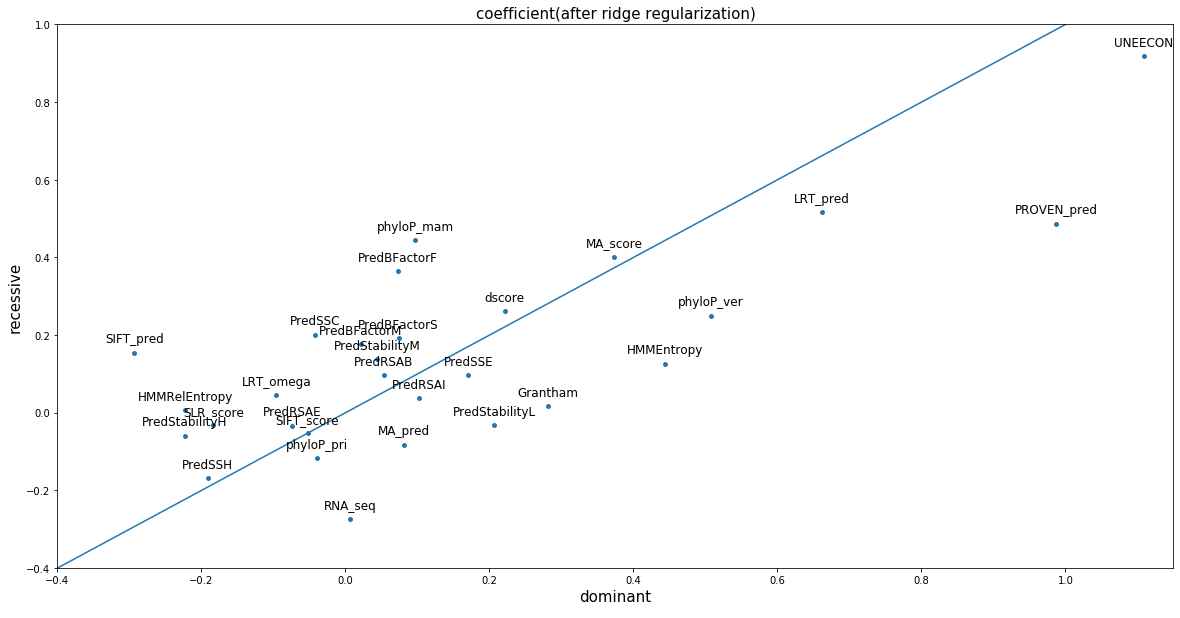

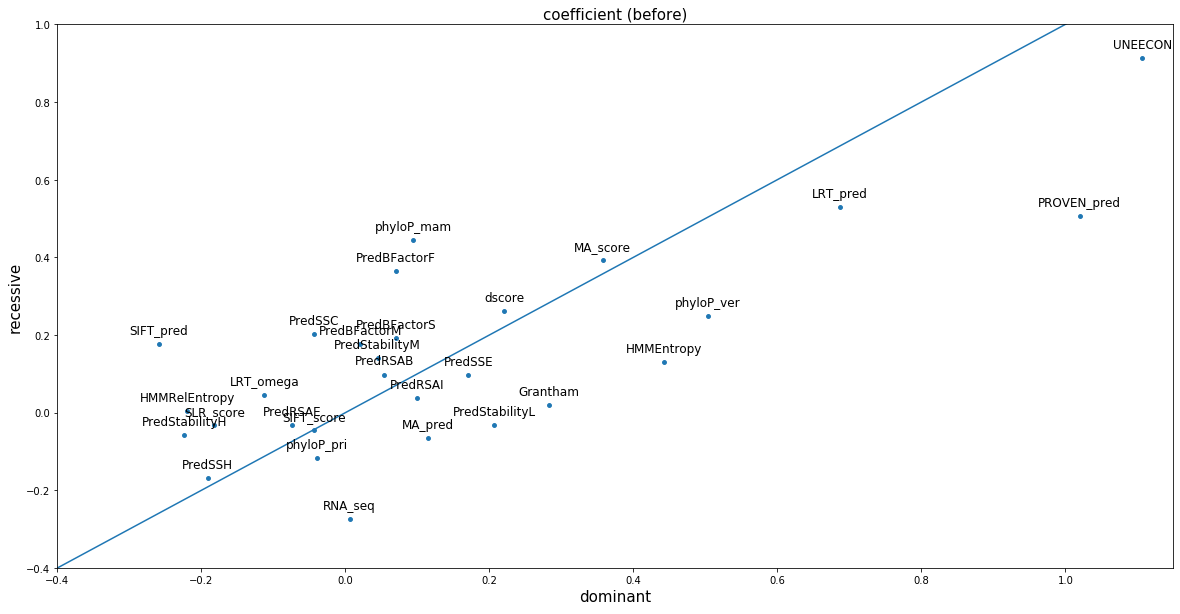

In [31]:
#bigger
plt.plot(a,a)
plt.scatter(cor_reg['domi_ridge'], cor_reg['recess_ridge'], s = 15)
i = 0
for x,y in zip(cor_reg['domi_ridge'], cor_reg['recess_ridge']):
    label = cor_reg.index[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size =12)
    i += 1
plt.xlim(-0.4,1.15)
plt.ylim(-0.4,1)
plt.title('coefficient(after ridge regularization)', size = 15)
plt.xlabel('dominant', size = 15)
plt.ylabel('recessive', size = 15)


plt.rcParams['figure.figsize'] = [20,10]
plt.show()


                   
plt.plot(a,a)
plt.scatter(cor_reg['dominant'], cor_reg['recessive'], s = 15)
i = 0
for x,y in zip(cor_reg['dominant'], cor_reg['recessive']):
    label = columnName[i]    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords = "offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                size = 12) 
    i += 1
plt.xlim(-0.4,1.15)
plt.ylim(-0.4,1)
plt.title('coefficient (before)', size =15)
plt.xlabel('dominant', size = 15)
plt.ylabel('recessive', size = 15)    
plt.show()


## seperate data into three part (testing/validation/training) although we only used two parts here



In [31]:
def split(df, Xname, Yname, testsize = 0.1):
    y = df.loc[:,[Yname]].values
    y = y.flatten()
    X = df.loc[:,Xname]
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = testsize, random_state = 42)
    
    
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = testsize, random_state = 42)    
    Xtrain, Xvalid, ytrain, yvalid =  train_test_split(Xtrain,ytrain, test_size = 0.11, random_state = 42)
    
    return(Xtrain, Xvalid, Xtest, ytrain, yvalid, ytest)




X_train, X_valid, X_test, y_train, y_valid, y_test = split(omit, x_column, y_column)
X_train_domi, X_valid_domi, X_test_domi, y_train_domi, y_valid_domi, y_test_domi = split(dominant, x_column, y_column)
X_train_recess, X_valid_recess, X_test_recess, y_train_recess, y_valid_recess, y_test_recess = split(recessive, x_column, y_column)
   

    

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


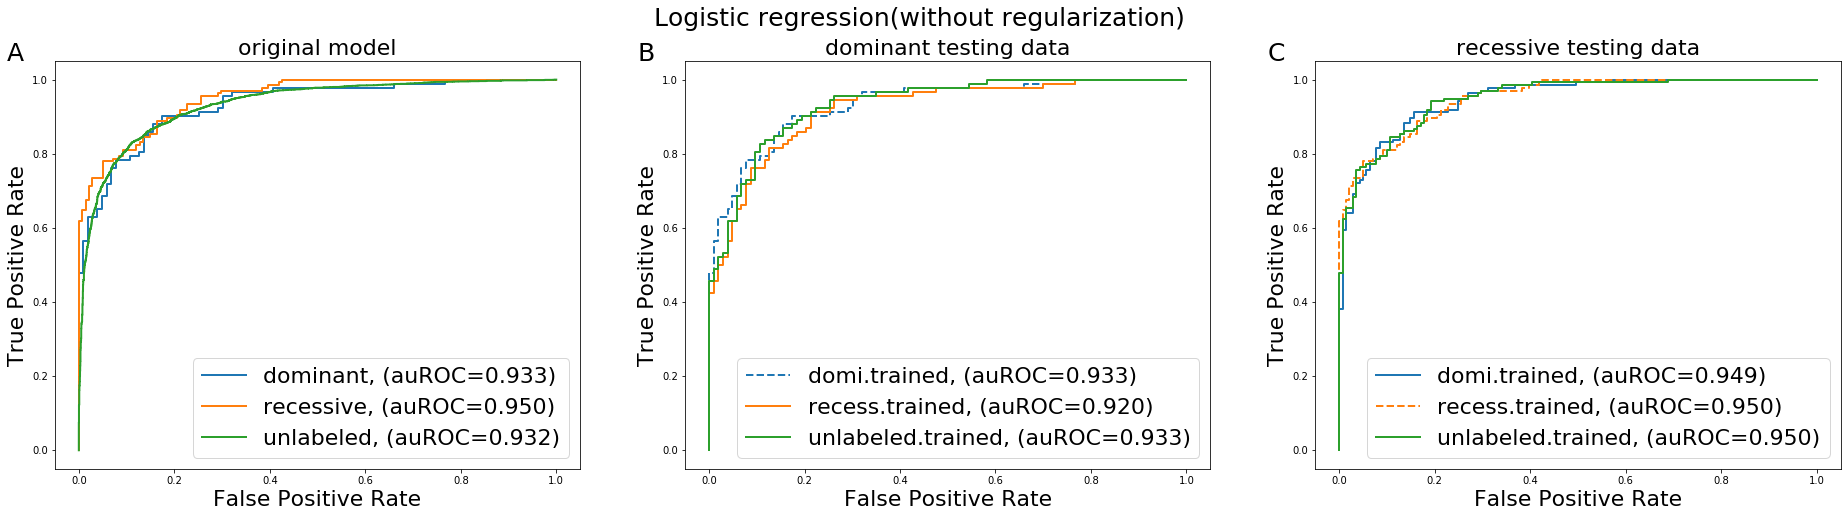

In [40]:
def logistic_not_l2(Xtrain, ytrain, Xtest, ytest, fitmodel = False):    
    if(fitmodel != False):
        model = fitmodel
    else:
        model = LogisticRegression(random_state = 42, penalty = 'none', solver = 'lbfgs').fit(Xtrain, ytrain)
    test_hat = model.predict_proba(Xtest)[:,1]
    return(ytest,test_hat, model)

plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Logistic regression(without regularization)', size = 25)

domi = logistic_not_l2(X_train_domi, y_train_domi, X_test_domi, y_test_domi)
recess = logistic_not_l2(X_train_recess, y_train_recess, X_test_recess, y_test_recess)
omit = logistic_not_l2(X_train, y_train, X_test, y_test)

domi_cross = logistic_not_l2(0, 0, X_test_domi, y_test_domi, fitmodel = recess[2])
recess_cross = logistic_not_l2(0,0, X_test_recess, y_test_recess, fitmodel = domi[2])

domi_overall = logistic_not_l2(0,0,X_test_domi, y_test_domi, fitmodel = omit[2])
recess_overall = logistic_not_l2(0,0,X_test_recess, y_test_recess, fitmodel = omit[2])


get_ROC(ax[0],domi[0],domi[1],label = 'dominant')
get_ROC(ax[0],recess[0],recess[1], label = "recessive")
get_ROC(ax[0],omit[0],omit[1], label = "unlabeled",  lastone = True, title = "original model")
ax[0].text(-0.15, 1.05, 'A', size = 25)


domi_cross_omit = splitNfit(dominant, x_column, y_column, regression = omit2[5])
recess_cross_omit = splitNfit(recessive, x_column, y_column, regression = omit2[5])

get_ROC(ax[1],domi[0],domi[1],label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_cross[0],domi_cross[1],label = 'recess.trained')
get_ROC(ax[1], domi_overall[0],domi_overall[1],label = 'unlabeled.trained',lastone = True, title = "dominant testing data")
ax[1].text(-0.15, 1.05, 'B', size = 25)


get_ROC(ax[2], recess_cross[0],recess_cross[1], label = "domi.trained")
get_ROC(ax[2],recess[0],recess[1], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_overall[0],recess_overall[1], label = 'unlabeled.trained', lastone = True, title = "recessive testing data")
ax[2].text(-0.15, 1.05, 'C', size = 25)

plt.savefig('figure/2_logistic_roc.pdf', bbox_inches='tight')
plt.show()

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


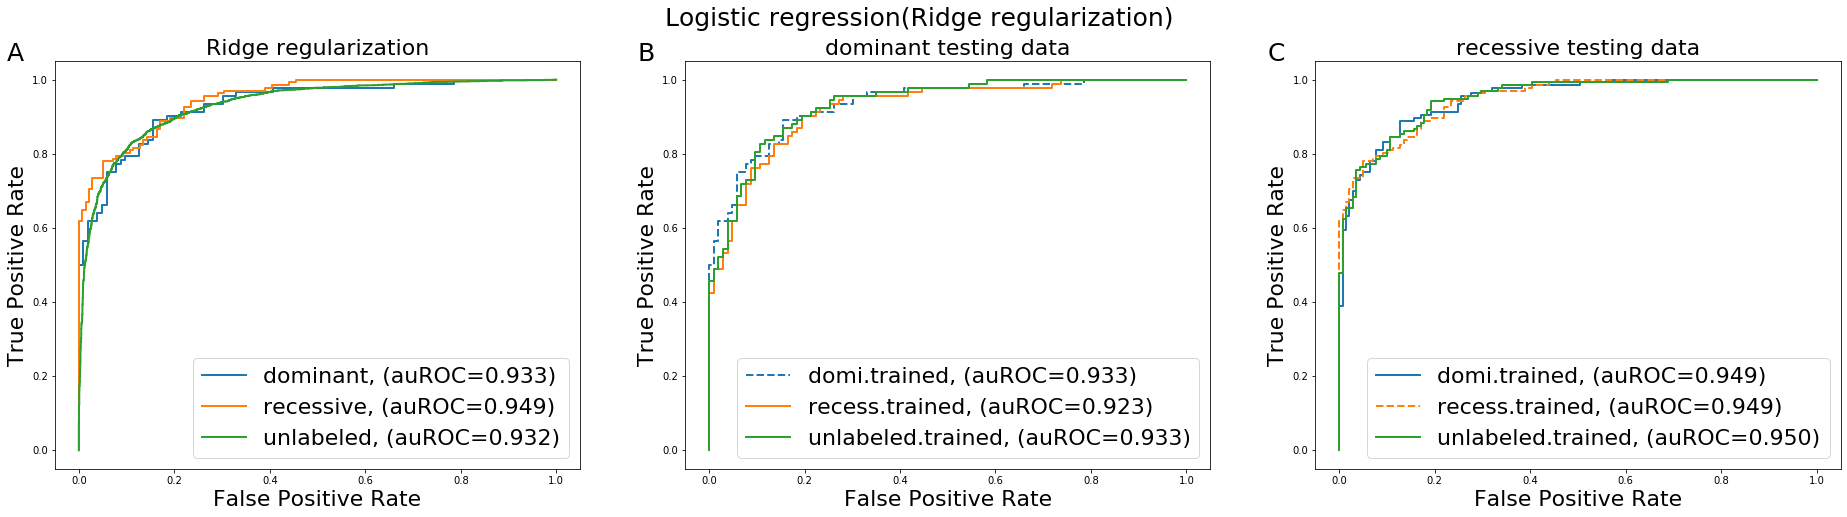

In [38]:
def logistic(Xtrain, ytrain, Xtest, ytest, fitmodel = False):    
    if(fitmodel != False):
        model = fitmodel
        
    else:
        model = LogisticRegression(random_state = 42 , penalty = 'l2').fit(Xtrain, ytrain)
        
    test_hat = model.predict_proba(Xtest)[:,1]
    return(ytest,test_hat, model)


plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Logistic regression(Ridge regularization)', size = 25)
    
domi_l2 = logistic(X_train_domi, y_train_domi, X_test_domi, y_test_domi)
recess_l2 = logistic(X_train_recess, y_train_recess, X_test_recess, y_test_recess)
omit_l2 = logistic(X_train, y_train, X_test, y_test)

domi_l2_cross = logistic(0, 0, X_test_domi, y_test_domi, fitmodel = recess_l2[2])
recess_l2_cross = logistic(0,0, X_test_recess, y_test_recess, fitmodel = domi_l2[2])

domi_l2_overall = logistic(0,0,X_test_domi, y_test_domi, fitmodel = omit_l2[2])
recess_l2_overall = logistic(0,0,X_test_recess, y_test_recess, fitmodel = omit_l2[2])


get_ROC(ax[0], domi_l2[0], domi_l2[1],label = 'dominant')
get_ROC(ax[0], recess_l2[0],recess_l2[1], label = "recessive")
get_ROC(ax[0], omit_l2[0],omit_l2[1],label = "unlabeled" ,lastone = True, title = "Ridge regularization")
ax[0].text(-0.15, 1.05, 'A', size = 25)

# dominant

get_ROC(ax[1], domi_l2[0], domi_l2[1],label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_l2_cross[0], domi_l2_cross[1],label = 'recess.trained')
get_ROC(ax[1], domi_l2_overall[0], domi_l2_overall[1],label = 'unlabeled.trained', lastone = True, title = 'dominant testing data')

ax[1].text(-0.15, 1.05, 'B', size = 25)


#recessive
get_ROC(ax[2], recess_l2_cross[0],recess_l2_cross[1], label = "domi.trained")
get_ROC(ax[2], recess_l2[0],recess_l2[1], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_l2_overall[0],recess_l2_overall[1], label = "unlabeled.trained",lastone = True, title = "recessive testing data")
ax[2].text(-0.15, 1.05, 'C', size = 25)

plt.savefig('figure/2_ridge.pdf',bbox_inches='tight')
plt.show()

#tunning

In [36]:
logistic_overall= splitNfit(omit, x_column, y_column, regulation = 'l2')
coef_overall = logistic_overall[5].coef_.flatten()


AttributeError: 'tuple' object has no attribute 'loc'

In [29]:
columnName = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON']
cor = pd.DataFrame({'overall':coef_overall}, index = columnName)
print(cor)


                 overall
SIFT_pred       0.652096
LRT_pred        0.461767
MA_pred        -0.091394
PROVEN_pred     0.400858
SLR_score      -0.053527
SIFT_score      0.098586
LRT_omega      -0.064068
MA_score        0.517918
PROVEN_score   -0.327062
Grantham        0.011272
HMMEntropy     -0.299983
HMMRelEntropy   0.413041
PredRSAB       -0.007955
PredRSAI        0.001254
PredRSAE        0.000360
PredBFactorF    0.003847
PredBFactorM   -0.117091
PredBFactorS   -0.022536
PredStabilityH  0.000744
PredStabilityM  0.024712
PredStabilityL -0.012161
PredSSE         0.146742
PredSSH        -0.256082
PredSSC         0.221565
dscore          0.063531
phyloP_pri      0.007965
phyloP_mam      0.091112
phyloP_ver      0.432215
RNA_seq         0.145826
UNEECON         1.006863


In [30]:
omit

,location,accession_num,clinvar_result,SIFT_pred,LRT_pred,MA_pred,PROVEN_pred,SLR_score,SIFT_score,LRT_omega,...,PredStabilityL,PredSSE,PredSSH,PredSSC,dscore,phyloP_pri,phyloP_mam,phyloP_ver,RNA_seq,UNEECON
0,chr1-865627-865628-G-A,ENSG00000187634.6|SAMD11,0,1,0,1,1,0.567591,-0.560382,-0.028677,...,0.459999,-1.569589,0.905304,2.826057,-1.110045,0.378256,-0.563796,-0.202553,-0.438463,-0.879019
1,chr1-879480-879481-G-C,ENSG00000187634.6|SAMD11,0,1,1,1,1,0.139500,-0.611212,-0.028677,...,1.205068,-0.888451,0.797889,0.794489,-0.944183,0.461238,-0.126614,-0.068657,0.000950,-0.850706
2,chr1-891392-891393-G-A,ENSG00000188976.6|NOC2L,0,0,0,0,0,0.017887,3.501810,-0.028677,...,-0.989648,-0.018997,0.172930,-0.418998,-0.024069,-1.228886,-0.390394,0.647021,0.434310,-0.880028
3,chr1-897008-897009-A-G,ENSG00000187961.9|KLHL17,0,0,0,0,0,0.017887,1.453542,-0.028267,...,0.707005,-0.944544,0.973658,0.480892,-0.418505,0.202131,0.455316,-1.057934,-0.292152,-0.871721
4,chr1-901921-901922-G-A,ENSG00000187583.6|PLEKHN1,0,1,0,0,0,0.017887,-0.288379,-0.026846,...,1.282004,-1.717837,0.377995,4.789453,0.582024,0.474786,0.946135,-0.925145,-0.463558,-0.868551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77675,chrY-2655441-2655442-A-G,ENSG00000184895.6|SRY,1,1,0,1,1,0.017887,-0.615334,0.000248,...,-1.370281,1.796035,-1.936306,-0.691691,-0.024069,-0.385517,-0.549836,0.641486,-1.418591,-0.196822
77676,chrY-2655452-2655453-C-T,ENSG00000184895.6|SRY,1,1,0,1,1,0.017887,-0.605029,0.000248,...,-0.495634,0.674161,-0.618033,-0.568979,-0.024069,-0.370275,-0.471951,0.383931,-1.352285,-0.346186
77677,chrY-2655466-2655467-C-G,ENSG00000184895.6|SRY,1,1,0,1,1,0.017887,-0.615334,0.000248,...,-0.750740,-0.948551,0.905304,0.699048,-0.024069,-0.370275,-1.167034,-0.316806,-1.325785,-0.405250
77678,chrY-2655555-2655556-C-A,ENSG00000184895.6|SRY,1,1,0,0,1,0.017887,-0.602968,0.000248,...,1.391335,-0.543874,0.627001,0.099120,-0.024069,-0.370275,-1.244918,-1.042165,-1.696274,-0.693081


In [43]:
#
coef_domi = domi_l2[2].coef_.flatten()
coef_recess = recess_l2[2].coef_.flatten()
coef_overall = omit_l2[2].coef_.flatten()

cor_reg = pd.DataFrame({'domi_ridge':coef_domi, 'recess_ridge': coef_recess, 'overall': coef_overall}, index = x_column)
print(cor_reg)

                domi_ridge  recess_ridge   overall
SIFT_pred        -0.103577      0.219523  0.653349
LRT_pred          0.534397      0.444339  0.476416
MA_pred           0.212358      0.067671 -0.017159
PROVEN_pred       0.899142      0.240607  0.397403
SLR_score        -0.248228      0.004266 -0.056289
SIFT_score       -0.073088     -0.146165  0.104149
LRT_omega        -0.111732     -0.281798  0.001018
MA_score          0.317034      0.209090  0.446644
PROVEN_score      0.235623     -0.696776 -0.334095
Grantham          0.329481     -0.065062  0.004424
HMMEntropy        0.531988      0.126446 -0.285760
HMMRelEntropy    -0.301049      0.053138  0.404657
PredRSAB         -0.006284      0.020531 -0.011912
PredRSAI          0.210761      0.066158  0.008465
PredRSAE         -0.067894      0.015529  0.005388
PredBFactorF      0.284133      0.203819 -0.026375
PredBFactorM      0.088670     -0.011707 -0.129079
PredBFactorS      0.262422      0.097404 -0.050239
PredStabilityH   -0.258980     

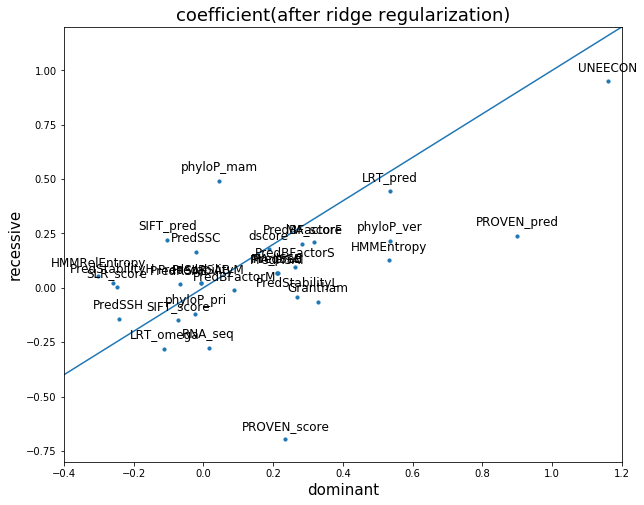

In [46]:
#bigger
a = np.arange(-1,4)
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(a,a)
plt.scatter(cor_reg['domi_ridge'], cor_reg['recess_ridge'], s = 10)
i = 0
for x,y in zip(cor_reg['domi_ridge'], cor_reg['recess_ridge']):
    label = cor_reg.index[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size =12)
    i += 1
plt.xlim(-0.4,1.2)
plt.ylim(-0.8,1.2)
plt.title('coefficient(after ridge regularization)', size = 18)
plt.xlabel('dominant', size = 15)
plt.ylabel('recessive', size = 15)


plt.savefig('figure/2_LR_RIDGE_Coef_new.pdf',bbox_inches='tight')
plt.show()




In [42]:
# original
coef_domi = domi[2].coef_.flatten()
coef_recess = recess[2].coef_.flatten()
coef_overall = omit[2].coef_.flatten()

cor_ori = pd.DataFrame({'domi':coef_domi, 'recess': coef_recess, 'overall': coef_overall}, index = x_column)
print(cor_ori)

                    domi    recess   overall
SIFT_pred      -0.103581  0.219523  0.652416
LRT_pred        0.534392  0.444339  0.478757
MA_pred         0.212353  0.067671 -0.068908
PROVEN_pred     0.899139  0.240607  0.397388
SLR_score      -0.248228  0.004266 -0.050163
SIFT_score     -0.073085 -0.146165  0.111425
LRT_omega      -0.111733 -0.281798  0.004390
MA_score        0.317031  0.209090  0.499469
PROVEN_score    0.235627 -0.696776 -0.350258
Grantham        0.329480 -0.065062  0.001471
HMMEntropy      0.531986  0.126446 -0.273459
HMMRelEntropy  -0.301048  0.053138  0.401743
PredRSAB       -0.006284  0.020531 -0.006081
PredRSAI        0.210760  0.066158 -0.001942
PredRSAE       -0.067893  0.015529  0.000556
PredBFactorF    0.284134  0.203819 -0.009066
PredBFactorM    0.088672 -0.011707 -0.116920
PredBFactorS    0.262424  0.097404 -0.036667
PredStabilityH -0.258981  0.023449 -0.000266
PredStabilityM -0.005238  0.020859  0.027410
PredStabilityL  0.269430 -0.042513 -0.011691
PredSSE   

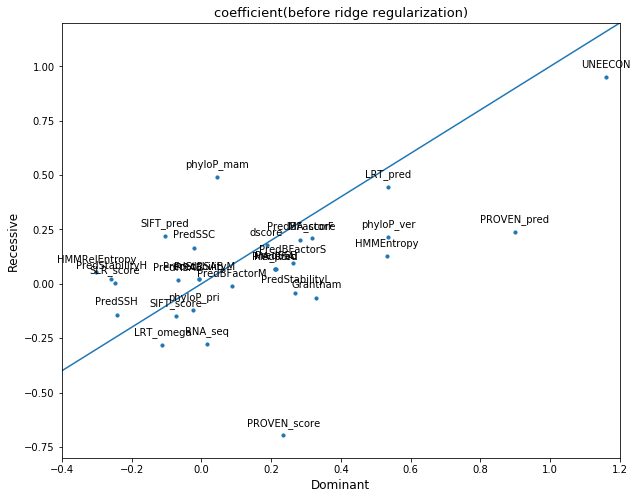

In [82]:
#bigger
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(a,a)
plt.scatter(cor_ori['domi'], cor_ori['recess'], s = 10)
i = 0
for x,y in zip(cor_ori['domi'], cor_ori['recess']):
    label = cor_ori.index[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size =10)
    i += 1
plt.xlim(-0.4,1.2)
plt.ylim(-0.8,1.2)
plt.title('coefficient(before ridge regularization)', size = 13)
plt.xlabel('Dominant', size = 12)
plt.ylabel('Recessive', size = 12)

plt.savefig('figure/2_LR_Coef_new.pdf')
plt.show()




In [43]:
cor_ori['domi']

SIFT_pred        -0.103581
LRT_pred          0.534392
MA_pred           0.212353
PROVEN_pred       0.899139
SLR_score        -0.248228
SIFT_score       -0.073085
LRT_omega        -0.111733
MA_score          0.317031
PROVEN_score      0.235627
Grantham          0.329480
HMMEntropy        0.531986
HMMRelEntropy    -0.301048
PredRSAB         -0.006284
PredRSAI          0.210760
PredRSAE         -0.067893
PredBFactorF      0.284134
PredBFactorM      0.088672
PredBFactorS      0.262424
PredStabilityH   -0.258981
PredStabilityM   -0.005238
PredStabilityL    0.269430
PredSSE           0.212719
PredSSH          -0.242553
PredSSC          -0.022060
dscore            0.186918
phyloP_pri       -0.022498
phyloP_mam        0.046166
phyloP_ver        0.535696
RNA_seq           0.015113
UNEECON           1.159797
Name: domi, dtype: float64